In [1]:
import spacy
import en_core_web_sm
import pandas as pd
import spacytextblob.spacytextblob as spacytextblob
import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import glob

dataframes = []
jsonfiles = glob.glob('/Users/User/Downloads/Data_Reddit_Comments/opiates_comments*.json')

for file in jsonfiles:
    temp = pd.read_json(file)
    dataframes.append(temp)

df = pd.concat(dataframes, ignore_index=True)

display(df.head())

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

nlp.select_pipes(disable=['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'])



,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,editable,steward_reports,updated_utc,author_created_utc,nest_level,reply_delay,user_removed,mod_removed,rte_mode,permalink_url
0,[],False,NaN,sumuroy,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,NaN,OG-Droppa,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,NaN,buick916,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,NaN,dioblohunter,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,NaN,Otherwise-Finger-161,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [2]:

df = df.loc[(df['body'] != '') & (df['body'] != '[deleted]') & (df['body'] != '[removed]') & (df['author'] != '[deleted]')]
df = df.dropna(subset=['body']).reset_index(drop=True)
df.reset_index(inplace=True, drop=True)

display(df.head())
display(df['body'])

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,editable,steward_reports,updated_utc,author_created_utc,nest_level,reply_delay,user_removed,mod_removed,rte_mode,permalink_url
0,[],False,NaN,sumuroy,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,NaN,OG-Droppa,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,NaN,buick916,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,NaN,dioblohunter,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,NaN,Otherwise-Finger-161,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0          Well I would have to agree with you. That was ...
1                         You’re in a better place now dog 💯
2          I feel like a bad mood/mindset/situation can d...
3          If it's pure diamorphine then it is possible b...
4          I don’t seem to be getting high and when I run...
                                 ...                        
3762440                              057 upside down was LSD
3762441    I used with my cousin too. PM me as well if yo...
3762442    I actually just posted about this on a differe...
3762443         B ready for anything n dbtgs plan could work
3762444    Dude, if you're doing percs every day, even 10...
Name: body, Length: 3762445, dtype: object

In [3]:
results = []

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    text = row['body']
    blob = nlp(text)._.blob
    results.append(blob)

    # Print the status by overwriting the same row
    status = f"Processing row {index + 1} out of {len(df)}"
    print(status, end='\r')  # The end='\r' overwrites the same line in the console

# Add the results as a new column in the DataFrame
df['blob'] = results

df['polarity'] = df['blob'].apply(lambda blob: blob.polarity)
df['subjectivity'] = df['blob'].apply(lambda blob: blob.subjectivity)

df['formatted_date'] = df['created_utc'].apply(lambda date: datetime.datetime.fromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S'))
df['month'] = df['formatted_date'].apply(lambda date: date.split('-')[1])
df['year'] = df['formatted_date'].apply(lambda date: date.split('-')[0])

In [ ]:
display(df['polarity'].describe())
display(df['subjectivity'].describe())

display(df)



count    3.762445e+06
mean     9.036155e-02
std      2.739067e-01
min     -1.000000e+00
25%      0.000000e+00
50%      3.125000e-02
75%      2.210989e-01
max      1.000000e+00
Name: polarity, dtype: float64

count    3.762445e+06
mean     4.459128e-01
std      2.826910e-01
min      0.000000e+00
25%      2.500000e-01
50%      5.000000e-01
75%      6.305556e-01
max      1.000000e+00
Name: subjectivity, dtype: float64

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,user_removed,mod_removed,rte_mode,permalink_url,blob,polarity,subjectivity,formatted_date,month,year
0,[],False,NaN,sumuroy,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(W, e, l, l, , I, , w, o, u, l, d, , h, a, ...",0.041667,0.150000,2022-09-29 23:57:57,09,2022
1,[],False,NaN,OG-Droppa,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(Y, o, u, ’, r, e, , i, n, , a, , b, e, t, ...",0.500000,0.500000,2022-09-29 23:57:48,09,2022
2,[],False,NaN,buick916,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(I, , f, e, e, l, , l, i, k, e, , a, , b, ...",-0.016746,0.509471,2022-09-29 23:56:21,09,2022
3,[],False,NaN,dioblohunter,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(I, f, , i, t, ', s, , p, u, r, e, , d, i, ...",0.104592,0.445408,2022-09-29 23:53:08,09,2022
4,[],False,NaN,Otherwise-Finger-161,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(I, , d, o, n, ’, t, , s, e, e, m, , t, o, ...",-0.277143,0.698571,2022-09-29 23:52:10,09,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3762440,NaN,NaN,NaN,Jdub415,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(0, 5, 7, , u, p, s, i, d, e, , d, o, w, n, ...",-0.155556,0.288889,2015-06-25 00:07:39,06,2015
3762441,NaN,NaN,NaN,lyssalu86,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(I, , u, s, e, d, , w, i, t, h, , m, y, , ...",0.000000,0.000000,2015-06-25 00:06:58,06,2015
3762442,NaN,NaN,NaN,FluteOfTheCommodore,NaN,,NaN,NaN,Oxycodone,NaN,...,NaN,NaN,NaN,NaN,"(I, , a, c, t, u, a, l, l, y, , j, u, s, t, ...",0.008929,0.425306,2015-06-25 00:04:56,06,2015
3762443,NaN,NaN,NaN,myvalidusername,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(B, , r, e, a, d, y, , f, o, r, , a, n, y, ...",0.200000,0.500000,2015-06-25 00:04:23,06,2015


In [ ]:
df_grouped = df.groupby(lambda x: df['month'][x])

for month, group in df_grouped:
    display(group)
    display(group['polarity'].describe())



,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,user_removed,mod_removed,rte_mode,permalink_url,blob,polarity,subjectivity,formatted_date,month,year
190793,[],0.0,NaN,nethingerrything88,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(T, o, t, a, l, l, y, , t, r, u, e, , -, , ...",-0.044524,0.791429,2022-01-31 23:59:21,01,2022
190794,[],0.0,NaN,Percpain,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(W, h, a, t, ’, s, , t, h, e, , s, h, a, r, ...",-0.180000,0.643333,2022-01-31 23:59:07,01,2022
190795,[],0.0,NaN,AutoModerator,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(W, e, l, c, o, m, e, , t, o, , r, /, o, p, ...",0.132812,0.604167,2022-01-31 23:58:01,01,2022
190796,[],0.0,NaN,TATP1982,,,"[{'a': ':pods:', 'e': 'emoji', 'u': 'https://e...",None,:pods: PhD in Opioidology :pods:,dark,...,NaN,NaN,NaN,NaN,"(T, h, e, n, , w, h, a, t, , i, s, , t, h, ...",-0.375000,0.333333,2022-01-31 23:54:16,01,2022
190797,[],0.0,NaN,Percpain,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(I, ’, m, , s, t, i, l, l, , g, o, i, n, g, ...",0.000000,0.000000,2022-01-31 23:53:29,01,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525368,NaN,NaN,NaN,chilltownb,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(T, h, i, s, , y, e, a, r, , s, u, c, k, e, ...",0.468182,0.727273,2016-01-01 00:17:39,01,2016
3525369,NaN,NaN,NaN,jdmhero,NaN,turtle,NaN,NaN,Used to have cool turtle flair :(,NaN,...,NaN,NaN,NaN,NaN,"(H, a, p, p, y, , n, e, w, , y, e, a, r, s, ...",0.468182,0.727273,2016-01-01 00:14:19,01,2016
3525370,NaN,NaN,NaN,WannabeChipper,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(H, a, v, e, , y, o, u, , c, o, n, s, i, d, ...",0.000000,0.000000,2016-01-01 00:10:55,01,2016
3525371,NaN,NaN,NaN,1eyeRye,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(H, a, p, p, y, , N, e, w, , Y, e, a, r, , ...",0.214899,0.665404,2016-01-01 00:09:33,01,2016


count    353701.000000
mean          0.091304
std           0.275509
min          -1.000000
25%           0.000000
50%           0.032000
75%           0.225000
max           1.000000
Name: polarity, dtype: float64

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,user_removed,mod_removed,rte_mode,permalink_url,blob,polarity,subjectivity,formatted_date,month,year
168773,[],NaN,NaN,groundpigeon,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(“, B, l, u, e, s, ”, , t, h, a, t, , y, o, ...",0.000000,0.000000,2022-02-28 23:58:42,02,2022
168774,[],NaN,NaN,percmetro,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(Y, a, h, , i, t, , s, t, i, l, l, , w, o, ...",0.500000,0.500000,2022-02-28 23:56:46,02,2022
168775,[],NaN,NaN,Kcizzle19,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(2, , m, o, n, t, h, s, , r, i, g, h, t, , ...",0.616071,0.567857,2022-02-28 23:53:13,02,2022
168776,[],NaN,NaN,Pro-co,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(O, n, e, , m, i, l, l, i, o, n, , p, e, s, ...",0.000000,0.000000,2022-02-28 23:51:33,02,2022
168777,[],NaN,NaN,smart4agirl666,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(t, h, a, t, s, , f, a, i, r, ., , i, , l, ...",0.406667,0.568333,2022-02-28 23:50:58,02,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497404,NaN,NaN,NaN,indalcecio,NaN,,NaN,NaN,that's mine i dropped it,NaN,...,NaN,NaN,NaN,NaN,"(H, e, ', s, , s, e, c, r, e, t, l, y, , a, ...",0.066667,0.600000,2016-02-01 00:04:30,02,2016
3497405,NaN,NaN,NaN,oh_no_five_oh,NaN,cop,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(T, h, o, u, g, h, , I, , d, o, n, ', t, , ...",0.135714,0.473639,2016-02-01 00:04:28,02,2016
3497406,NaN,NaN,NaN,UserUsed,NaN,,NaN,NaN,DEAD NODDIN,NaN,...,NaN,NaN,NaN,NaN,"(N, o, , w, a, y, , m, a, n, , t, h, e, , ...",-0.800000,0.900000,2016-02-01 00:01:51,02,2016
3497407,NaN,NaN,NaN,oh_no_five_oh,NaN,cop,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(V, e, r, y, , e, a, s, y, , t, o, , g, e, ...",-0.039444,0.637500,2016-02-01 00:01:47,02,2016


count    277339.000000
mean          0.092702
std           0.274832
min          -1.000000
25%           0.000000
50%           0.033333
75%           0.225000
max           1.000000
Name: polarity, dtype: float64

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,user_removed,mod_removed,rte_mode,permalink_url,blob,polarity,subjectivity,formatted_date,month,year
146097,[],0.0,NaN,gibbying,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(Y, e, a, h, ,, , i, v, , h, a, d, , i, t, ...",-0.085185,0.512963,2022-03-31 23:59:14,03,2022
146098,[],0.0,NaN,SugarShane333,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(N, o, ., , H, e, ’, s, , n, o, t, , d, e, ...",0.000000,0.000000,2022-03-31 23:58:00,03,2022
146099,[],0.0,NaN,thhhhhhhhhdjdhdhsidh,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(H, a, v, e, , y, o, u, , e, v, e, r, , t, ...",0.193182,0.574495,2022-03-31 23:57:53,03,2022
146100,[],0.0,NaN,daffyduckel,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(T, h, e, r, e, ', s, , a, l, w, a, y, s, , ...",0.111953,0.489057,2022-03-31 23:57:45,03,2022
146101,[],0.0,NaN,SugarShane333,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(P, u, t, , y, o, u, r, , d, o, s, e, , i, ...",0.516667,0.716667,2022-03-31 23:53:52,03,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3469327,NaN,NaN,NaN,street_philatelist,NaN,cupcake,NaN,NaN,I LIKE BIG BUTTS AND I CANT LIE///I HATE MYSEL...,NaN,...,NaN,NaN,NaN,NaN,"(T, h, a, t, , s, o, u, n, d, s, , w, a, y, ...",0.500000,0.500000,2016-03-01 00:05:07,03,2016
3469328,NaN,NaN,NaN,travs3dpe,NaN,stl,NaN,NaN,mydogneedsinsulin,NaN,...,NaN,NaN,NaN,NaN,"(y, e, p, , y, o, u, r, , r, i, g, h, t, , ...",0.142857,0.267857,2016-03-01 00:04:15,03,2016
3469329,NaN,NaN,NaN,fat_loser_junkie,NaN,,NaN,NaN,AKA - obese_unsuccesful_drugaddict,NaN,...,NaN,NaN,NaN,NaN,"(O, h, ,, , I, ', l, l, , b, e, , o, k, a, ...",0.500000,0.500000,2016-03-01 00:02:39,03,2016
3469330,NaN,NaN,NaN,garbageposter2468,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(W, h, a, t, , e, x, a, c, t, l, y, , i, s, ...",0.250000,0.250000,2016-03-01 00:02:31,03,2016


count    276172.000000
mean          0.091619
std           0.274285
min          -1.000000
25%           0.000000
50%           0.030612
75%           0.224903
max           1.000000
Name: polarity, dtype: float64

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,user_removed,mod_removed,rte_mode,permalink_url,blob,polarity,subjectivity,formatted_date,month,year
122963,[],0.0,NaN,ohiforgotaboutyou,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(G, o, , t, o, , a, l, -, a, n, o, n)",0.000000,0.000000,2022-04-30 23:57:12,04,2022
122964,[],0.0,NaN,broyal679,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(W, h, a, t, , w, e, r, e, , y, o, u, , i, ...",-0.043860,0.430326,2022-04-30 23:57:07,04,2022
122965,[],0.0,NaN,-IVoUoVI-,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(I, t, ', l, l, , p, r, o, b, a, b, l, y, , ...",-0.200000,0.800000,2022-04-30 23:56:44,04,2022
122966,[],0.0,NaN,AutoModerator,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(W, e, l, c, o, m, e, , t, o, , r, /, o, p, ...",0.132812,0.604167,2022-04-30 23:55:52,04,2022
122967,[],0.0,NaN,AutoModerator,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(W, e, l, c, o, m, e, , t, o, , r, /, o, p, ...",0.132812,0.604167,2022-04-30 23:55:22,04,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3443941,NaN,NaN,NaN,Zultrek,NaN,,NaN,NaN,Oxycodone,NaN,...,NaN,NaN,NaN,NaN,"(I, , t, h, i, n, k, , i, t, ', s, , m, o, ...",0.300000,0.666667,2016-04-01 00:08:23,04,2016
3443942,NaN,NaN,NaN,chilltownb,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(I, m, , c, h, o, m, p, i, n, g, , s, o, u, ...",0.067857,0.317857,2016-04-01 00:07:04,04,2016
3443943,NaN,NaN,NaN,Someone_who_isnt_hi,NaN,,NaN,NaN,Coconut oil,NaN,...,NaN,NaN,NaN,NaN,"(I, , w, a, s, , r, e, a, l, l, y, , i, n, ...",0.137500,0.608333,2016-04-01 00:04:05,04,2016
3443944,NaN,NaN,NaN,TheCarrierOfLight,NaN,,NaN,NaN,PharmacoloGeek💊,NaN,...,NaN,NaN,NaN,NaN,"([, L, A, , S, t, a, t, e, , S, T, D, /, H, ...",0.000000,0.000000,2016-04-01 00:02:44,04,2016


count    324835.000000
mean          0.091624
std           0.275183
min          -1.000000
25%           0.000000
50%           0.028030
75%           0.225000
max           1.000000
Name: polarity, dtype: float64

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,user_removed,mod_removed,rte_mode,permalink_url,blob,polarity,subjectivity,formatted_date,month,year
99434,[],0.0,NaN,teabags4gangstalkers,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(I, , s, u, g, g, e, s, t, , y, o, u, , g, ...",0.562500,0.744444,2022-05-31 23:57:32,05,2022
99435,[],0.0,NaN,psomnifermum,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(O, n, e, , p, e, r, c, , 3, 0, , i, s, , ...",0.000000,0.150000,2022-05-31 23:56:06,05,2022
99436,[],0.0,NaN,TATP1982,#878a8c,None,"[{'e': 'text', 't': '🇺🇦 Fuck Putin right in th...",f9b0b1b6-97f3-11ec-900d-3ed8ac3d1a67,🇺🇦 Fuck Putin right in the A 🇺🇦,dark,...,NaN,NaN,NaN,NaN,"(Y, e, s, ., , Y, o, u, , w, i, l, l, ., , ...",0.000000,0.000000,2022-05-31 23:37:47,05,2022
99437,[],0.0,NaN,tylerhurley8113,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(F, u, c, k, , h, i, m, , h, e, , d, o, e, ...",0.025000,0.335714,2022-05-31 23:36:50,05,2022
99438,[],0.0,NaN,frostwoolf21,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(C, h, e, c, k, , m, i, n, e, , l, a, s, t, ...",0.112000,0.501333,2022-05-31 23:34:47,05,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421859,NaN,NaN,NaN,thepolishwizard,NaN,,NaN,NaN,trawniki maków,NaN,...,NaN,NaN,NaN,NaN,"(d, a, m, n, ,, , i, , u, s, u, a, l, l, y, ...",0.209412,0.528824,2016-05-01 00:08:31,05,2016
3421860,NaN,NaN,NaN,ice_rink,NaN,ghost,NaN,NaN,the plug,NaN,...,NaN,NaN,NaN,NaN,"(L, o, l, , y, o, u, , h, a, v, n, ', t, , ...",0.400000,0.400000,2016-05-01 00:06:05,05,2016
3421861,NaN,NaN,NaN,around215,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(H, a, v, e, , y, o, u, , e, v, e, r, , u, ...",0.099545,0.561944,2016-05-01 00:06:00,05,2016
3421862,NaN,NaN,NaN,Drohannesburg,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(I, , u, s, e, d, , t, o, , e, x, p, e, r, ...",0.164583,0.569792,2016-05-01 00:02:50,05,2016


count    312630.000000
mean          0.090344
std           0.272767
min          -1.000000
25%           0.000000
50%           0.030159
75%           0.220000
max           1.000000
Name: polarity, dtype: float64

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,user_removed,mod_removed,rte_mode,permalink_url,blob,polarity,subjectivity,formatted_date,month,year
76636,[],0.0,NaN,lueek22,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(I, , w, i, l, l, , f, r, i, e, n, d, , t, ...",0.875000,0.600000,2022-06-30 23:57:57,06,2022
76637,[],0.0,NaN,Hot_Reflection5931,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(h, a, v, e, , a, , g, o, o, d, , t, i, m, ...",0.700000,0.600000,2022-06-30 23:57:00,06,2022
76638,[],0.0,NaN,Lawyermanblue215,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(Y, e, a, h, , b, r, o, , p, r, e, c, i, p, ...",-0.064583,0.518750,2022-06-30 23:56:45,06,2022
76639,[],0.0,NaN,dmoney665g,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(O, k, , y, e, a, h, , t, h, e, n, , w, e, ...",0.200000,0.450000,2022-06-30 23:55:28,06,2022
76640,[],0.0,NaN,Stiqqy,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(T, w, i, c, e, , a, , d, a, y, ,, , I, ', ...",0.000000,0.066667,2022-06-30 23:51:28,06,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3762440,NaN,NaN,NaN,Jdub415,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(0, 5, 7, , u, p, s, i, d, e, , d, o, w, n, ...",-0.155556,0.288889,2015-06-25 00:07:39,06,2015
3762441,NaN,NaN,NaN,lyssalu86,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(I, , u, s, e, d, , w, i, t, h, , m, y, , ...",0.000000,0.000000,2015-06-25 00:06:58,06,2015
3762442,NaN,NaN,NaN,FluteOfTheCommodore,NaN,,NaN,NaN,Oxycodone,NaN,...,NaN,NaN,NaN,NaN,"(I, , a, c, t, u, a, l, l, y, , j, u, s, t, ...",0.008929,0.425306,2015-06-25 00:04:56,06,2015
3762443,NaN,NaN,NaN,myvalidusername,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(B, , r, e, a, d, y, , f, o, r, , a, n, y, ...",0.200000,0.500000,2015-06-25 00:04:23,06,2015


count    2.964650e+05
mean     8.897037e-02
std      2.732354e-01
min     -1.000000e+00
25%     -9.251859e-18
50%      3.269231e-02
75%      2.166667e-01
max      1.000000e+00
Name: polarity, dtype: float64

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,user_removed,mod_removed,rte_mode,permalink_url,blob,polarity,subjectivity,formatted_date,month,year
53286,[],False,NaN,AutoModerator,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(W, e, l, c, o, m, e, , t, o, , r, /, o, p, ...",0.132812,0.604167,2022-07-31 23:56:08,07,2022
53287,[],False,NaN,LsangAnge,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(Y, o, u, r, e, , C, L, E, A, N, !, !, !, , ...",0.186863,0.329630,2022-07-31 23:56:03,07,2022
53288,[],False,NaN,BenedrylBooferBro,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(S, h, i, t, ., , H, a, v, e, , y, o, u, , ...",-0.200000,0.800000,2022-07-31 23:55:00,07,2022
53289,[],False,NaN,BenedrylBooferBro,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(W, o, w, ., , B, u, t, , i, t, , w, o, u, ...",0.261905,0.778571,2022-07-31 23:53:49,07,2022
53290,[],False,NaN,BenedrylBooferBro,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(Y, e, a, h, , m, a, k, e, s, , s, e, n, s, ...",0.250000,0.300000,2022-07-31 23:52:42,07,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757001,NaN,NaN,NaN,GreyWolf89,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(Y, e, a, h, , I, , d, o, n, t, , u, n, d, ...",-0.103000,0.580000,2015-07-01 00:08:16,07,2015
3757002,NaN,NaN,NaN,heroinking,NaN,,NaN,NaN,i wanna die in a heroin sunrise,NaN,...,NaN,NaN,NaN,NaN,"(f, u, c, k, , t, h, a, t, , m, a, n, ,, , ...",-0.200000,0.550000,2015-07-01 00:05:19,07,2015
3757003,NaN,NaN,NaN,sldkfdlfdf,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(y, e, p, ., ., ., t, o, t, a, l, l, y)",0.000000,0.000000,2015-07-01 00:03:47,07,2015
3757004,NaN,NaN,NaN,ScrotumAcne,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(C, o, n, s, t, a, n, t, l, y, ., , H, a, r, ...",-0.300000,0.466667,2015-07-01 00:02:08,07,2015


count    330028.000000
mean          0.090106
std           0.272762
min          -1.000000
25%           0.000000
50%           0.033333
75%           0.220000
max           1.000000
Name: polarity, dtype: float64

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,user_removed,mod_removed,rte_mode,permalink_url,blob,polarity,subjectivity,formatted_date,month,year
27506,[],False,NaN,missbobbi1969,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(I, ’, m, , l, o, o, k, i, n, g, , f, o, r, ...",0.000000,0.000000,2022-08-31 23:59:25,08,2022
27507,[],False,NaN,Farmers_wife748,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(I, , m, e, a, n, , y, o, u, , h, a, v, e, ...",0.176726,0.588005,2022-08-31 23:57:19,08,2022
27508,[],False,NaN,looking4yerks,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(I, , w, a, s, , p, r, e, s, c, r, i, b, e, ...",0.416667,0.916667,2022-08-31 23:55:23,08,2022
27509,[],False,NaN,Head-Chocolate-5747,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(I, ', m, , i, n, , N, o, r, t, h, , T, X, ...",0.066667,0.366667,2022-08-31 23:55:04,08,2022
27510,[],False,NaN,missbobbi1969,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(U, n, t, i, l, , n, e, x, t, , W, e, d, n, ...",0.136111,0.222222,2022-08-31 23:53:52,08,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727728,NaN,NaN,NaN,leazzel,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(N, e, v, e, r, , t, r, i, e, d, , h, e, r, ...",0.208333,0.321429,2015-08-01 00:05:31,08,2015
3727729,NaN,NaN,NaN,throwbackaccount22,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(O, k, a, y, , g, o, o, d, , t, o, , k, n, ...",0.402778,0.422222,2015-08-01 00:04:58,08,2015
3727730,NaN,NaN,NaN,alicecoopersbabymama,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(T, h, i, s, , m, a, k, e, s, , m, e, , g, ...",0.220000,0.680000,2015-08-01 00:04:37,08,2015
3727731,NaN,NaN,NaN,youngwarrenbuffet,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(Y, e, a, h, , b, u, t, , a, , b, , i, s, ...",0.000000,0.000000,2015-08-01 00:03:37,08,2015


count    340686.000000
mean          0.089143
std           0.273010
min          -1.000000
25%           0.000000
50%           0.030208
75%           0.216667
max           1.000000
Name: polarity, dtype: float64

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,user_removed,mod_removed,rte_mode,permalink_url,blob,polarity,subjectivity,formatted_date,month,year
0,[],False,NaN,sumuroy,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(W, e, l, l, , I, , w, o, u, l, d, , h, a, ...",0.041667,0.150000,2022-09-29 23:57:57,09,2022
1,[],False,NaN,OG-Droppa,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(Y, o, u, ’, r, e, , i, n, , a, , b, e, t, ...",0.500000,0.500000,2022-09-29 23:57:48,09,2022
2,[],False,NaN,buick916,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(I, , f, e, e, l, , l, i, k, e, , a, , b, ...",-0.016746,0.509471,2022-09-29 23:56:21,09,2022
3,[],False,NaN,dioblohunter,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(I, f, , i, t, ', s, , p, u, r, e, , d, i, ...",0.104592,0.445408,2022-09-29 23:53:08,09,2022
4,[],False,NaN,Otherwise-Finger-161,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(I, , d, o, n, ’, t, , s, e, e, m, , t, o, ...",-0.277143,0.698571,2022-09-29 23:52:10,09,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694205,NaN,NaN,NaN,nplp3,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(I, , c, a, l, l, , i, t, , d, o, a, p, ., ...",0.000000,0.000000,2015-09-01 00:05:09,09,2015
3694206,NaN,NaN,NaN,intermission11,NaN,,NaN,NaN,Heroin,NaN,...,NaN,NaN,NaN,NaN,"(A, w, e, s, o, m, e, !, , G, l, a, d, , t, ...",0.666667,1.000000,2015-09-01 00:04:23,09,2015
3694207,NaN,NaN,NaN,stahmpcollector,NaN,,NaN,NaN,Lick it and stick it,NaN,...,NaN,NaN,NaN,NaN,"(L, e, t, , u, s, , k, n, o, w, , w, h, a, ...",-0.375000,0.900000,2015-09-01 00:04:05,09,2015
3694208,NaN,NaN,NaN,sillylung1192,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(Y, e, a, h, , t, h, e, , s, h, o, t, , f, ...",0.100000,0.825000,2015-09-01 00:01:35,09,2015


count    274291.000000
mean          0.088856
std           0.270743
min          -1.000000
25%           0.000000
50%           0.033333
75%           0.216667
max           1.000000
Name: polarity, dtype: float64

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,user_removed,mod_removed,rte_mode,permalink_url,blob,polarity,subjectivity,formatted_date,month,year
278845,[],NaN,NaN,G00kMan,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(N, o, t, , s, u, p, r, i, s, e, d, ., , N, ...",0.000000,0.500000,2021-10-31 23:59:27,10,2021
278846,[],NaN,NaN,wmr00,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(A, , g, u, y, , I, , k, n, o, w, , m, a, ...",-0.162500,0.175000,2021-10-31 23:57:16,10,2021
278847,[],NaN,NaN,Consistent-Price-407,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(T, h, a, n, k, s, ,, , I, , d, o, n, ’, t, ...",0.033333,0.533333,2021-10-31 23:54:22,10,2021
278848,[],NaN,NaN,AutoModerator,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(W, e, l, c, o, m, e, , t, o, , r, /, o, p, ...",0.141335,0.568182,2021-10-31 23:54:22,10,2021
278849,[],NaN,NaN,MisterOutlaw,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(O, h, , l, o, r, d, ,, , I, , h, o, p, e, ...",-0.213889,0.422222,2021-10-31 23:53:27,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3656115,NaN,NaN,NaN,AmpMachine,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(F, i, n, a, l, l, y, , g, o, t, , a, r, o, ...",0.226705,0.546212,2015-10-01 00:07:27,10,2015
3656116,NaN,NaN,NaN,yepnewjersey,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(I, d, , r, e, c, o, m, m, e, n, d, , b, e, ...",0.033333,0.455556,2015-10-01 00:05:37,10,2015
3656117,NaN,NaN,NaN,morbo2000,NaN,,NaN,NaN,Candy!,NaN,...,NaN,NaN,NaN,NaN,"(s, w, e, e, t, ., , , i, t, , s, t, i, l, ...",0.383333,0.650000,2015-10-01 00:05:24,10,2015
3656118,NaN,NaN,NaN,inthea215,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(Y, e, a, h, , t, h, e, y, , p, r, o, b, a, ...",0.093609,0.504261,2015-10-01 00:04:41,10,2015


count    324436.000000
mean          0.088975
std           0.274826
min          -1.000000
25%           0.000000
50%           0.028571
75%           0.220000
max           1.000000
Name: polarity, dtype: float64

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,user_removed,mod_removed,rte_mode,permalink_url,blob,polarity,subjectivity,formatted_date,month,year
248216,[],NaN,NaN,Wickedwhiskbaker,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(L, o, o, k, , i, n, t, o, , W, e, l, l, b, ...",0.038889,0.427778,2021-11-30 23:59:38,11,2021
248217,[],NaN,NaN,slacksh0t,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(I, n, t, e, r, e, s, t, i, n, g, ., , W, h, ...",0.143750,0.418750,2021-11-30 23:53:23,11,2021
248218,[],0.0,NaN,Johndough1066,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(M, a, n, ,, , I, ', m, , s, o, r, r, y, , ...",-0.500000,1.000000,2021-11-30 23:50:20,11,2021
248219,[],NaN,NaN,M-30,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(W, h, a, t, , a, b, o, u, t, , s, u, b, o, ...",0.000000,0.000000,2021-11-30 23:48:46,11,2021
248220,[],NaN,NaN,MateusAmadeus714,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(G, o, d, , O, p, a, n, a, s, , w, e, r, e, ...",0.335204,0.617347,2021-11-30 23:48:35,11,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613840,NaN,NaN,NaN,street_philatelist,NaN,cupcake,NaN,NaN,I LIKE BIG BUTTS AND I CANT LIE///I HATE MYSEL...,NaN,...,NaN,NaN,NaN,NaN,"( , C, a, f, f, e, i, n, e, , m, a, y, b, e, ...",-0.025000,0.700000,2015-11-01 00:07:03,11,2015
3613841,NaN,NaN,NaN,younger_years,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(N, o, t, , s, u, r, e, , i, f, , y, o, u, ...",-0.250000,0.888889,2015-11-01 00:05:23,11,2015
3613842,NaN,NaN,NaN,keysoze,NaN,G74,NaN,NaN,how I miss you,NaN,...,NaN,NaN,NaN,NaN,"(T, h, e, , n, e, w, ,, , d, i, g, i, t, a, ...",0.068182,0.227273,2015-11-01 00:04:28,11,2015
3613843,NaN,NaN,NaN,theBLUEbomber_roxman,NaN,4812,NaN,NaN,,NaN,...,NaN,NaN,NaN,NaN,"(L, o, l, , d, i, d, n, ', t, , k, n, o, w, ...",0.291667,0.458333,2015-11-01 00:02:23,11,2015


count    316613.000000
mean          0.090291
std           0.274330
min          -1.000000
25%           0.000000
50%           0.031944
75%           0.222857
max           1.000000
Name: polarity, dtype: float64

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,user_removed,mod_removed,rte_mode,permalink_url,blob,polarity,subjectivity,formatted_date,month,year
217521,[],0.0,NaN,spinderella69,,spin,[],None,None,dark,...,NaN,NaN,NaN,NaN,"(I, , m, e, a, n, ,, , y, o, u, ', r, e, , ...",-0.287500,0.545833,2021-12-31 23:43:06,12,2021
217522,[],0.0,NaN,PolyDrugParadise,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(W, e, l, l, , s, o, m, e, t, h, i, n, g, , ...",-0.300000,0.400000,2021-12-31 23:39:34,12,2021
217523,[],0.0,NaN,hellocaptin,#7193ff,None,"[{'e': 'text', 't': '💉 Professor Boof, MD 💉'}]",9cb2fa6c-36cf-11ec-8f34-e2b4fa063fdf,"💉 Professor Boof, MD 💉",dark,...,NaN,NaN,NaN,NaN,"(S, h, i, t, t, t, , y, o, u, , c, a, n, ’, ...",0.800000,0.700000,2021-12-31 23:35:17,12,2021
217524,[],0.0,NaN,AutoModerator,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(W, e, l, c, o, m, e, , t, o, , r, /, o, p, ...",0.132812,0.604167,2021-12-31 23:32:41,12,2021
217525,[],0.0,NaN,Friendlyformeraddict,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,"(T, h, a, t, , p, i, l, l, , s, o, u, n, d, ...",1.000000,1.000000,2021-12-31 23:28:27,12,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3569442,NaN,NaN,NaN,derkman96,NaN,,NaN,NaN,LIVESTRUNG |--[==]---,NaN,...,NaN,NaN,NaN,NaN,"(I, , h, a, v, e, , n, o, , i, d, e, a, .)",0.000000,0.000000,2015-12-01 00:05:43,12,2015
3569443,NaN,NaN,NaN,nipandnod,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(D, u, d, e, ,, , I, , f, e, e, l, , y, o, ...",-0.175000,0.487879,2015-12-01 00:05:35,12,2015
3569444,NaN,NaN,NaN,cleanneedledirtybong,NaN,ghost,NaN,NaN,FUCKBITCHES/GHOSTLIFE,NaN,...,NaN,NaN,NaN,NaN,"(h, a, p, p, y, , b, i, r, t, h, d, a, y, , ...",0.712500,0.750000,2015-12-01 00:04:56,12,2015
3569445,NaN,NaN,NaN,MotorBoatinSumBitch,NaN,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,"(I, ', m, , a, c, t, u, a, l, l, y, , a, , ...",-0.075000,0.425000,2015-12-01 00:04:19,12,2015


count    335249.000000
mean          0.090549
std           0.274837
min          -1.000000
25%           0.000000
50%           0.030385
75%           0.223253
max           1.000000
Name: polarity, dtype: float64

In [ ]:
df_commenters = df.groupby('author').agg({'polarity': ['mean', 'count']})

df_commenters = df_commenters[df_commenters['polarity']['count'] > 50]

df_commenters = df_commenters.sort_values(('polarity', 'mean'), ascending=False)

display(df_commenters)

polarity      
                       mean count
author                           
ClickableLinkBot   0.490909    55
TheCustodian61     0.376526    79
FoxyRoxi           0.366878    68
smarqu14           0.325997    92
LustlessforLife    0.304964    70
...                     ...   ...
-kelsie           -0.090645    59
Blxckjxck007      -0.093496    53
mrowen79          -0.112180   104
LiveChatTherapist -0.157247    52
xkcd-Hyphen-bot   -0.188203    51

[11616 rows x 2 columns]

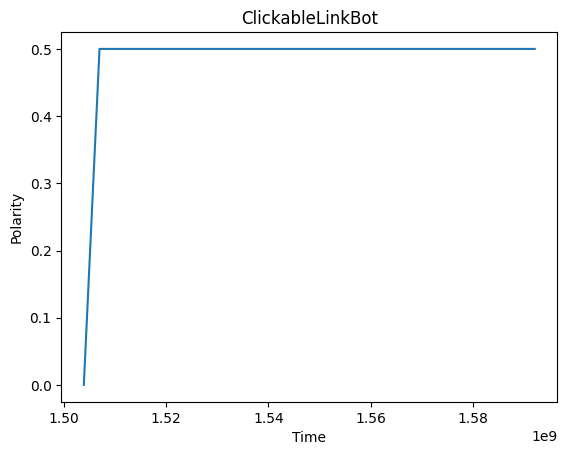

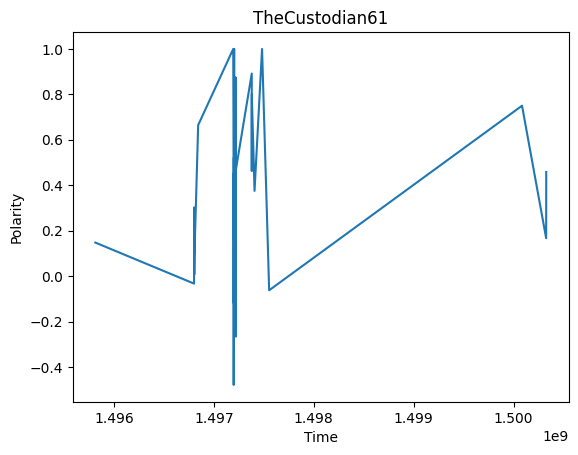

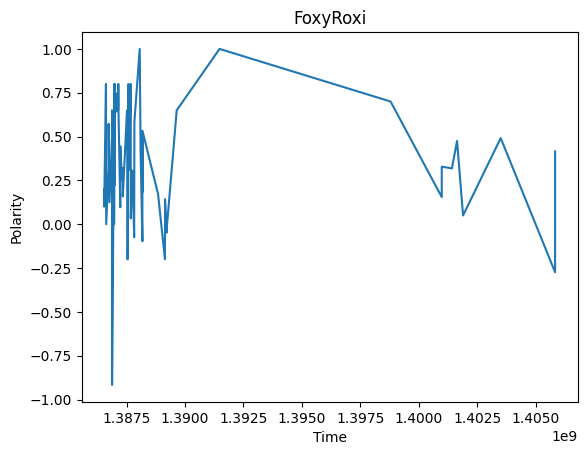

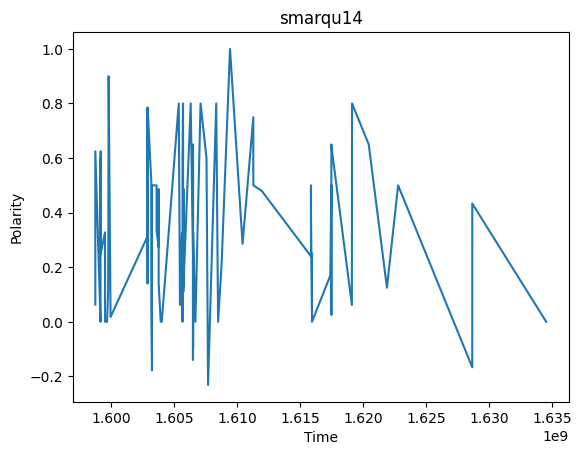

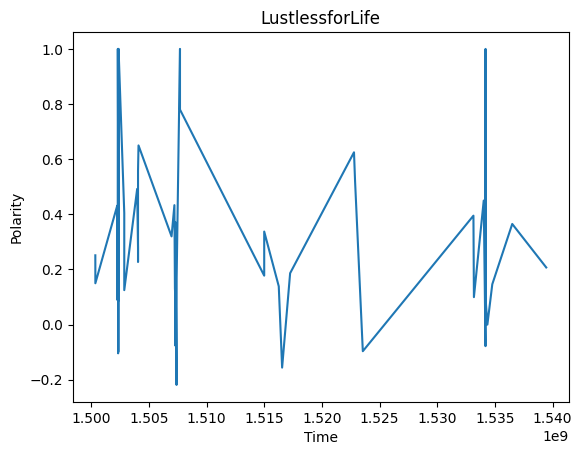

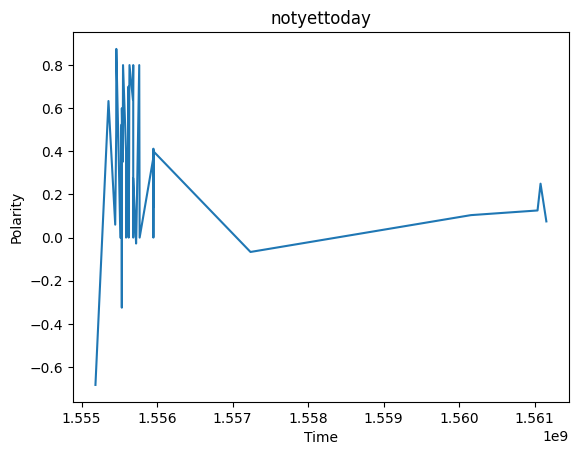

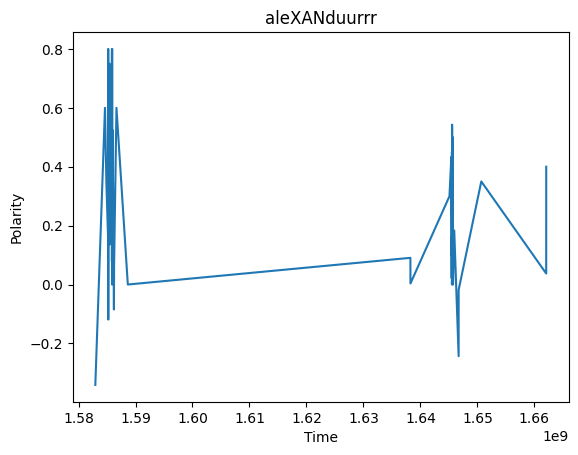

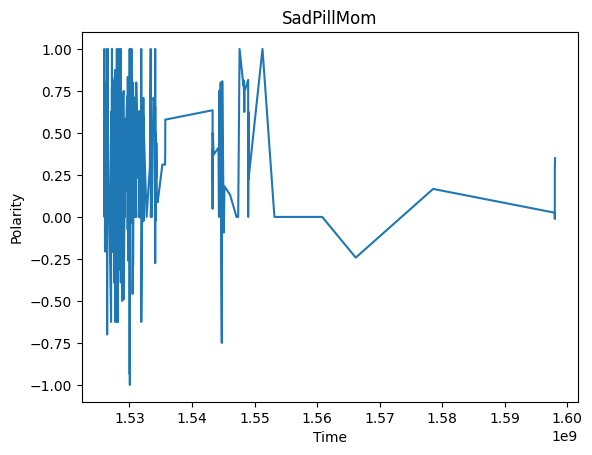

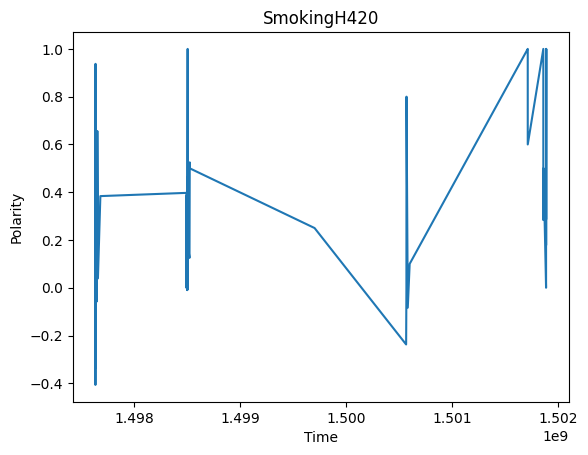

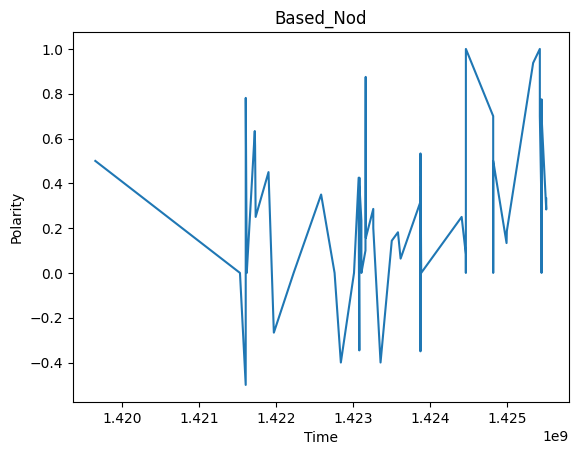

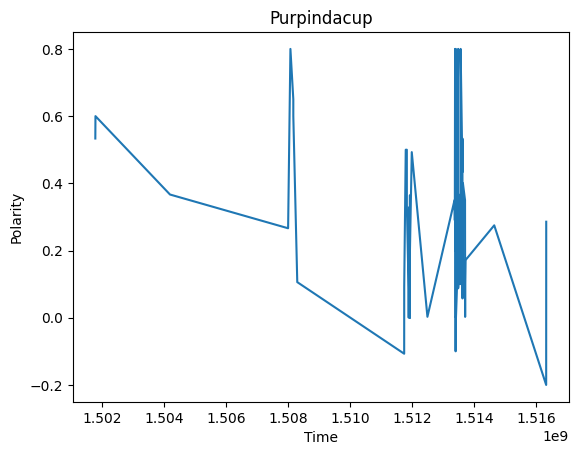

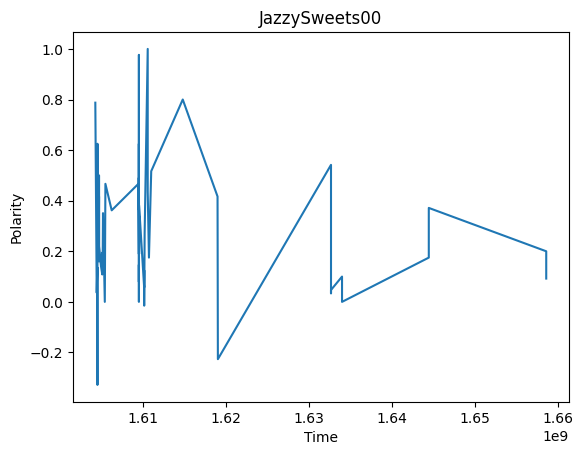

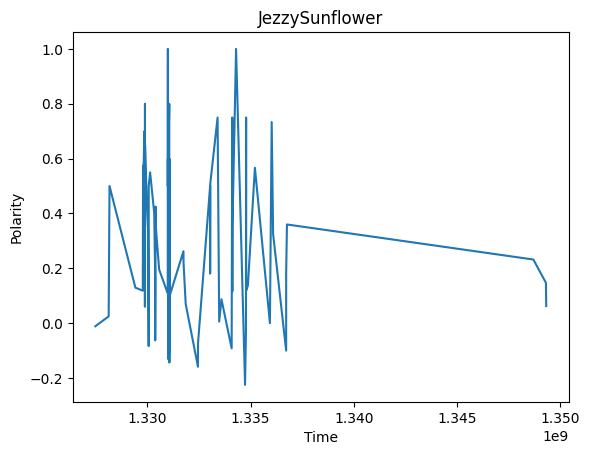

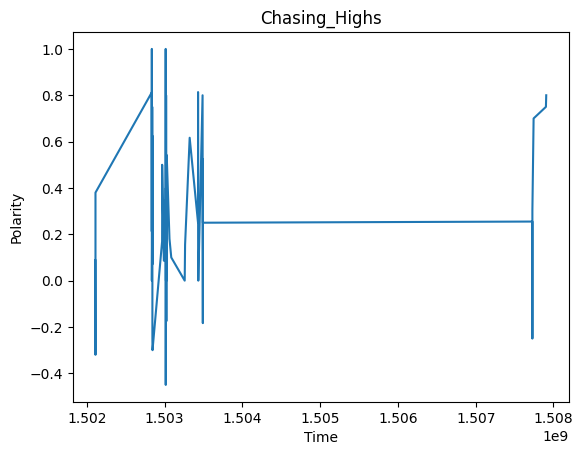

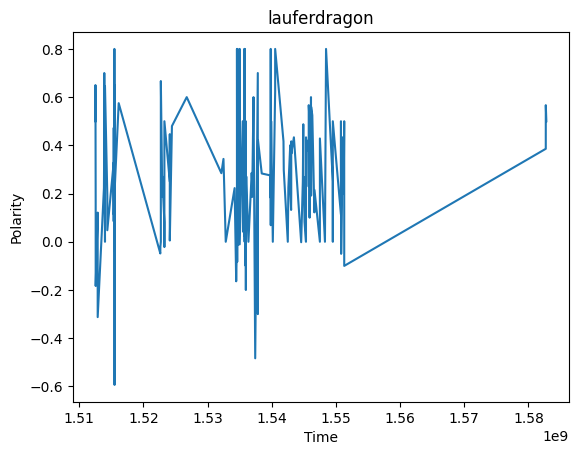

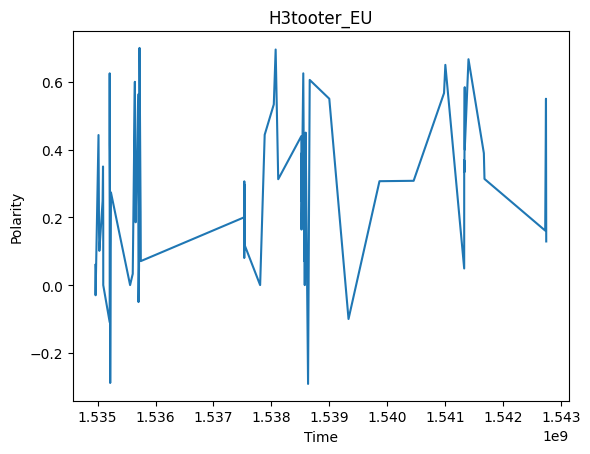

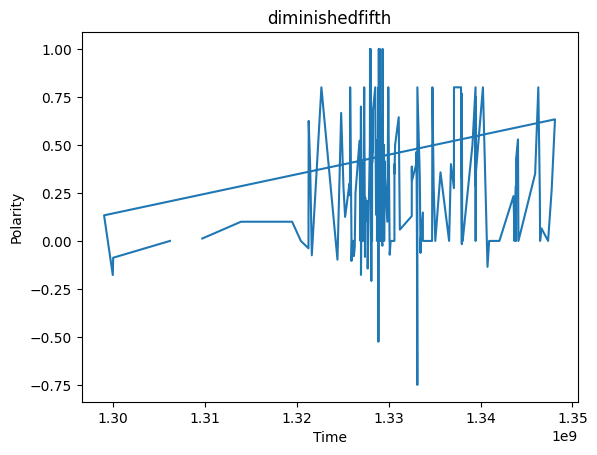

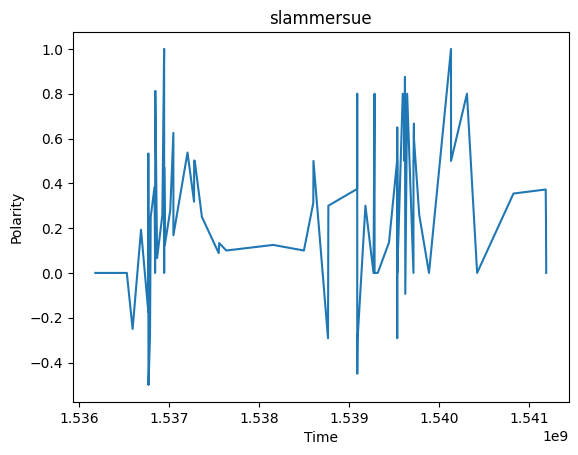

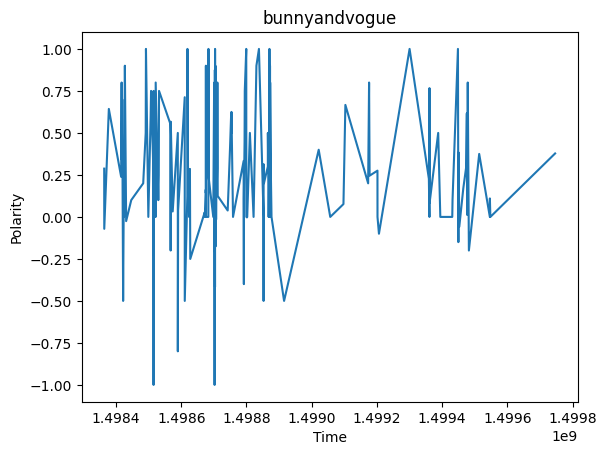

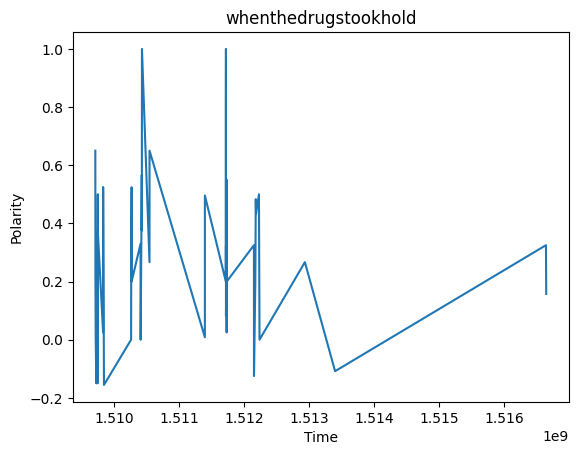

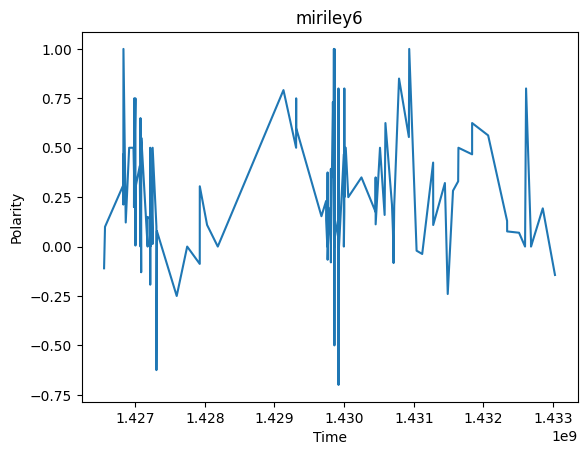

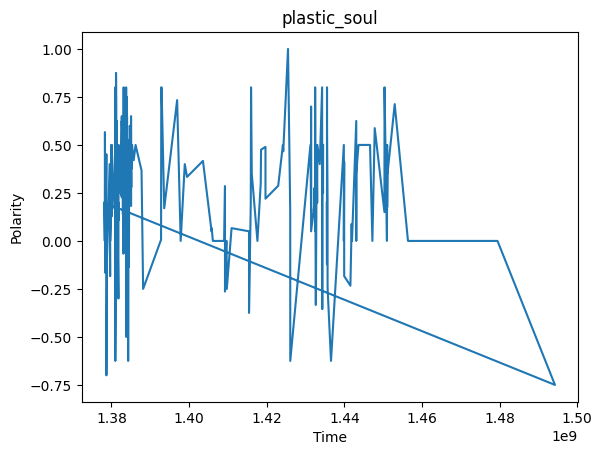

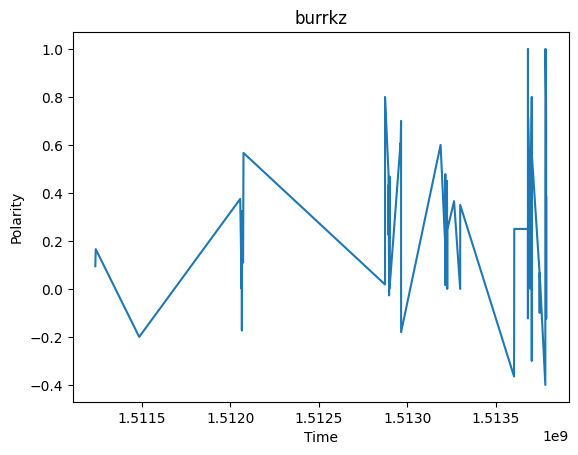

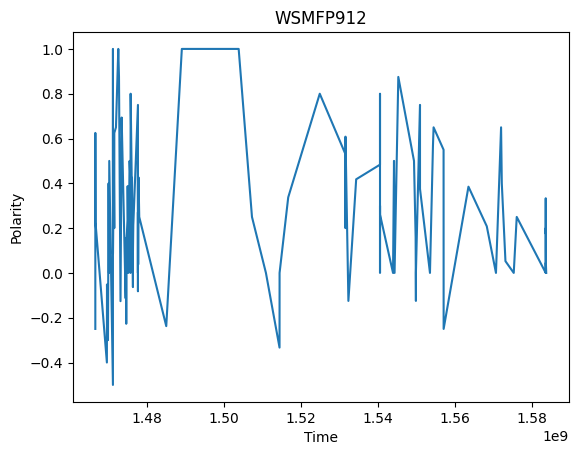

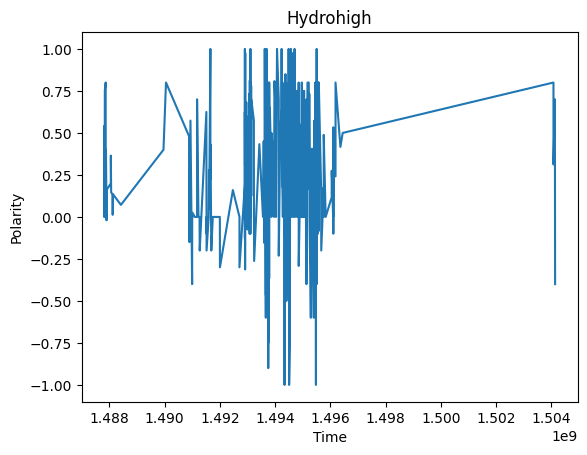

In [ ]:
for i in range(25):
    plt.plot(df.loc[df_commenters.index[i] == df['author']]['created_utc'], df.loc[df_commenters.index[i] == df['author']]['polarity'])
    plt.xlabel('Time')
    plt.ylabel('Polarity')
    plt.title(df_commenters.index[i])
    plt.show()  





In [ ]:
df.to_json('reddit_opiates_comments.json')
df_commenters.to_json('reddit_opiates_top_commenters.json')